### 합성곱  
**합성곱**(convolution)은 마치 입력 데이터에 마법의 도장을 찍어서 유용한 특성만 드러나게 하는 것으로 비유할 수 있다. 합성곱의 동작 원리를 자세히 알아보자.
<br><br/>
7장에서 사용한 밀집층에는 뉴런마다 입력 개수만큼의 가중치가 있다.  
즉 모든 입력에 가중치를 곱한다. 이 과정을 그림으로 표현하면 다음과 같다.  
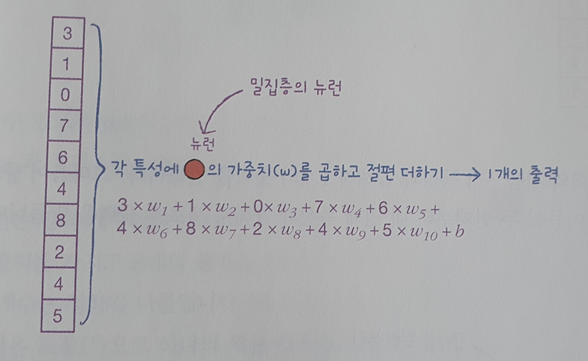  
인공 신경망은 처음에 가중치 w<sub>1</sub> ~ w<sub>10</sub>과 절편 b를 랜덤하게 초기화한 다음 에포크를 반복하면서 경사 하강법 알고리즘을 사용하여 손실이 낮아지도록 최적의 가중치와 절편을 찾아간다. 이것이 바로 모델 훈련이다.
<br><br/>
예를 들어 밀집층에 뉴런이 3개 있다면 출력이 3개가 된다.입력 개수에 상관없이 동일하다. 7장의 예를 들어보면 패션 MNIST 이미지에 있는 784개의 픽셀을 입력받는 은닉층의 뉴런 개수가 100개면 뉴런마다 하나씩 출력도 100개가 된다.
<br><br/>
합성곱은 밀집층의 계산과 조금 다르다. 입력 데이터 전체에 가중치를 적용하는 것이 아니라 일부에 가중치를 곱한다. 다음 그림과 이전의 밀집층 그림을 비교해 보자. 여기에서는 이 뉴런이 3개의 가중치를 가진다고 가정하였다.  
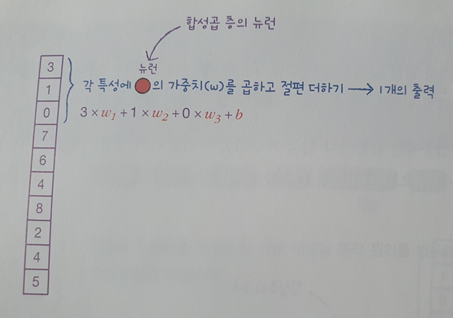  
가중치 w<sub>1</sub> ~ w<sub>3</sub>이 입력의 처음 3개 특성과 곱해져 1개의 출력을 만든다. 그리고 이 뉴런이 한 칸 아래로 이동해 두 번째부터 네 번째 특성과 곱해져 새로운 출력을 만든다. 다음 그림을 참고하자  
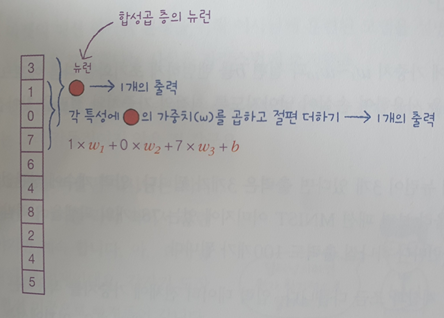  
여기에서 중요한 것은 첫 번째 합성곱에 사용된 가중치 w<sub>1</sub> ~ w<sub>3</sub>과 절편 b가 두 번째 합성곱에도 동일하게 사용된다. 이렇게 한 칸씩 아래로 이동하면서 출력을 만드는 것이 합성곱이다. 여기에서는 이 뉴런의 가중치가 3개이기 때문에 모두 8개의 출력이 만들어진다.  
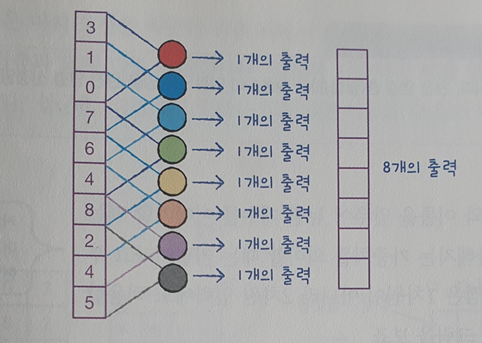  
쉽게 구분할 수 있도록 8번의 계산을 다른 색으로 나타냈지만 모두 같은 뉴런이다. 즉 모두 같은 가중치 w<sub>1</sub> ~ w<sub>3</sub>과 절편 b를 사용한다.  
<br><br/>
밀집층의 뉴런은 입력 개수만큼 10개의 가중치를 가지고 1개의 출력을 만든다. 합성곱 층의 뉴런은 3개의 가중치를 가지고 8개의 출력을 만든다. 합성곱 층의 뉴런에 있는 가중치 개수는 정하기 나름이다. 즉 또 다른 하이퍼파라미터이다.  
이는 마치 입력 데이터 위를 이동하면서 같은 도장으로 하나씩 찍는 것 처럼 생각할 수 있다. 도장을 찍을 떄마다 출력이 하나씩 만들어지는 것이다.  
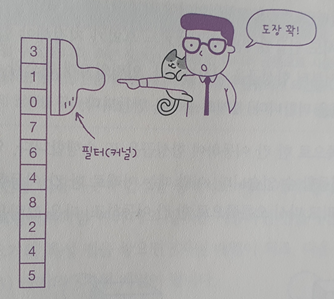  
이전에 그렸던 신경망 층의 그림은 뉴런이 길게 늘어서 있고 서로 조밀하게 연결되어 있다. 합성곱에서는 뉴런이 입력 위를 이동하면서 출력을 만들기 때문에 신경망 층의 그림으로 표현하기가 어렵다. 또한 뉴런이라고 표현하기도 어렵다.  
**합성곱 신경망**(convolutional neural network, CNN)에서는 완전 연결 신경망과 달리 뉴런을 **필터**(filter)라고 부른다. 혹은 **커널**(kernel)이라고도 부른다.

#### 완전 연결 신경망?  
7장에서 만들었던 신경망이다. 완전 연결층(밀집층)만 사용하여 만든 신경망을 완전 연결 신경망(밀집 신경망)이라고 부른다.

케라스 API와 이름을 맞추어 뉴런 개수를 이야기할 때는 필터라 부르고, 입력에 곱해지는 가중치를 의미할 때는 커널이라고 부른다. 합성곱의 장점은 1차원이 아니라 2차원 입력에도 적용할 수 있다는 것이다.  
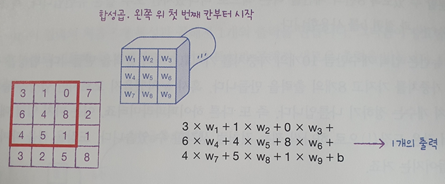  
입력이 2차원 배열이면 필터(도장!!)도 2차원이어야 한다. 이 그림에서 이 필터의 커널 크기는 (3,3)으로 가정한다.(커널 크기는 지정해야 할 하이퍼파라미터이다.)  
그다음 왼쪽 위 모서리에서부터 합성곱을 시작한다. 입력의 9개 원소와 커널의 9개 가중치를 곱한 후(물론 절편을 더한다) 1개의 출력을 만든다.
<br><br/>
그다음에는 필터가 오른쪽으로 한 칸 이동하여 합성곱을 또 수행한다. 입력의 너비가 4이므로 더이상 오른쪽으로는 한 칸 이동할 수 없다. 이럴 때는 아래로 한 칸 이동한 다음 다시 왼쪽에서부터 합성곱을 수행한다. 그리고 다시 오른쪽으로 한 칸 이동한다.  
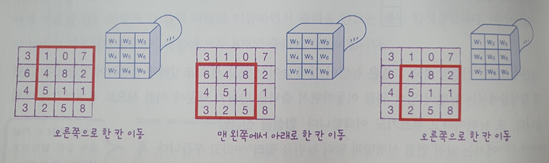
합성곱은 마치 도장을 찍듯이 왼쪽 위에서 오른쪽 맨 아래까지 이동하면서 출력을 만든다. 계산식은 밀집층과 크게 다르지 않다. 입력과 가중치의 행과 열을 맞추어 곱셈하고 모두 더하는게 전부이다.  
그림에서 필터는 모두 4번 이동할 수 있기 때문에 4개의 출력을 만든다.  
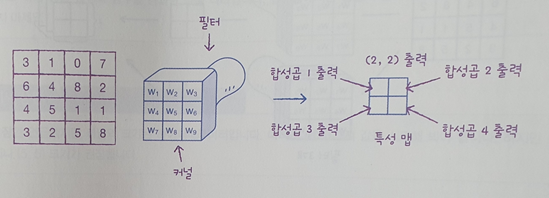  
이때 4개의 출력을 필터가 입력에 놓인 위치에 맞게 2차원으로 배치한다. 즉 왼쪽 위, 오른쪽 위, 왼쪽 아래, 오른쪽 아래 모두 4개의 위치에 해당 값을 놓는다.  
이렇게 출력을 2차원으로 표현하면 (4,4)크기의 입력을 (2,2)크기로 압축한 느낌이 난다. 합성곱 계산을 통해 얻은 출력을 **특성 맵**(feature map)이라고 부른다.

밀집층에서 여러 개의 뉴런을 사용하듯이 합성곱 층에서도 여러 개의 필터를 사용한다. 하나만 사용할 이유는 없다. 다음 그림에서처럼 여러 개의 필터를 사용하면 만들어진 특성 맵은 순서대로 차곡차곡 쌓인다. (2,2) 크기의 특성 맵을 쌓으면 3차원 배열이 된다.  
다음 그림에서는 3개의 필터를 사용했기 때문에 (2,2,3) 크기의 3차원 배열이 된다.  
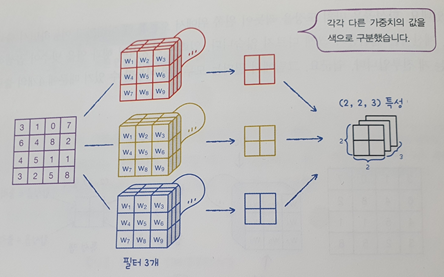  
밀집층에 있는 뉴런의 가중치가 모두 다르듯이 합성곱 층에 있는 필터의 가중치(커널)도 모두 다르다. 같은 가중치를 가진 필터를 여러 개 사용할 이유가 없다.
<br><br/>
실제 계산은 밀집층과 동일하게 단순히 입력과 가중치를 곱하는 것이지만 2차원 형태를 유지한다는 점이 다르다. 또한 입력보다 훨씬 작은 크기의 커널을 사용하고 입력 위를(왼쪽에서 오른쪽으로, 위에서 아래로) 이동하면서 2차원 특성 맵을 만든다.  
이렇게 2차원 구조를 그대로 사용하기 때문에 합성곱 신경망이 이미지 처리 분야에서 뛰어난 성능을 발휘한다.  
케라스에서 합성곱 층을 만드는 방법을 알아보자.

### 케라스 합성곱 층  
케라스의 층은 모두 keras.layers 패키지 아래 클래스로 구현되어 있다. 합성곱 층도 마찬가지이다. 입력 위를(왼쪽에서 오른쪽으로, 위에서 아래로) 이동하는 합성곱은 Conv2D 클래스로 제공한다.  
<br><br/>

```python
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation = 'relu'  
```
<br><br/>
Conv2D 클래스의 첫 번째 매개변수는 필터의 개수이다. kernel_size 매개변수는 필터에 사용할 커널의 크기를 지정한다. 필터의 개수와 커널의 크기는 반드시 지정해야 하는 매개변수이다.  
마지막으로 밀집층에서처럼 활성화 함수를 지정한다.

#### 특성 맵은 활성화 함수를 적용하기 전? 후?   
활성화 함수 적용 후이다. 완전 연결 신경망에서처럼 합성곱 신경망에서도 종종 활성화 함수를 언급하지 않는다.

#### 커널의 크기를 어떻게 정하나?  
커널의 크기는 하이퍼파라미터이다. 따라서 여러 가지 값을 시도해 봐야 하며 보통 (3,3)이나 (5,5) 크기가 권장된다.

케라스 API를 사용하면 합성곱 층을 사용하는 것이 어렵지 않다. 이전에 Dense 층을 사용했던 자리에 대신 Conv2D 층을 넣으면 된다. 다만 kernel_size와 같이 추가적인 매개변수들을 고려해야 한다.
<br><br/>
합성곱 신경망의 정의는 무엇일까? 일반적으로 1개 이상의 합성곱 층을 쓴 인공 신경망을 합성곱 신경망이라고 부른다. 꼭 합성곱 층만 사용한 신경망을 합성곱 신경망이라고 부르는 것은 아니다.  
이전 장에서 보았듯이 클래스에 대한 확률을 계산하려면 마지막 층에 클래스 개수만큼의 뉴런을 가진 밀집층을 두는 것이 일반적이기 때문이다.

### 패딩과 스트라이드  
예로 들었던 합성곱 계산은 (4,4) 크기의 입력에 (3,3) 크기의 커널을 적용하여 (2,2) 크기의 특성 맵을 만들었다. 만약 커널 크기는 (3,3)으로 그대로 두고 출력의 크기를 입력과 동일하게 (4,4)로 만들려면 어떻게 해야 할까?  
(4,4) 입력과 동일한 크기의 출력을 만들려면 마치 더 큰 입력에 합성곱하는 척해야 한다. 예를 들어 실제 입력 크기는 (4,4)이지만 (6,6)처럼 다룬다고 가정해 보자. 아래의 그림과 같이 (6,6) 크기이면 (3,3) 크기의 커널로 합성곱을 했을 때 출력의 크기가 얼마나 될까?  
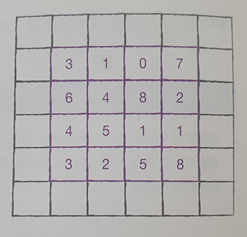  
(3,3) 커널로 도장을 찍어 보면 출력의 크기가 (4,4)가 되는 것을 알 수 있다. 다음 그림의 빨강핵 상자가 커널을 나타낸다.  
왼쪽 위에서 오른쪽 아래까지 한 칸씩 이동하면서 합성곱을 수행하면 입력과 같은 (4,4) 크기의 출력을 만들 수 있다.  
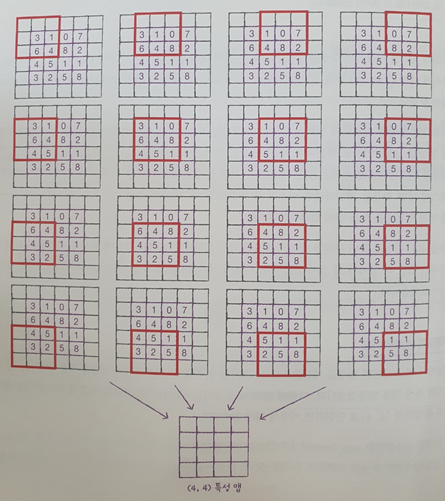  
이렇게 입력 배열의 주위를 가상의 원소로 채우는 것을 **패딩**(padding)이라고 한다. 실제 입력값이 아니기 때문에 패딩은 0으로 채운다. 즉 (4,4) 크기의 입력에 0을 1개 패딩하면 다음과 같은 (6,6) 크기의 입력이 된다. 패딩의 역할은 커널이 도장을 찍을 횟수를 늘려주는 것밖에는 없다. 실제 값은 0으로 채워져 있기 때문에 계산에 영향을 미치지 않는다.  
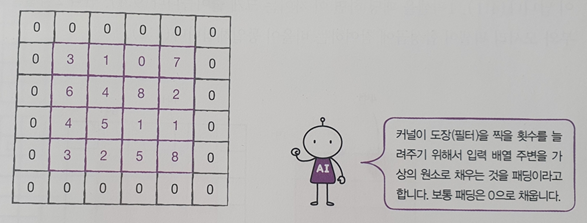  
이렇게 입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩 하는 것을 **세임 패딩**(same padding)이라고 부른다. 합성곱 신경망에서는 세임 패딩이 많이 사용된다. 바꿔 말하면 입력과 특성 맵의 크기를 동일하게 만드는 경우가 많다.  
패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우를 **밸리드 패딩**(valid padding)이라고 한다. 밸리드 패딩은 특성 맵의 크기가 줄어들 수밖에 없다.
<br><br/>
왜 합성곱에서는 패팅을 자주 사용할까? 만약 패딩이 없다면 위의 예에서 (4,4) 크기의 입력에 패딩 없이 합성곱을 한다면 왼쪽 위 모서리의 3은 커널 도장에 딱 한 번만 찍힌다. 네 모서리에 있는 다른 3개의 값도 마찬가지이다.  
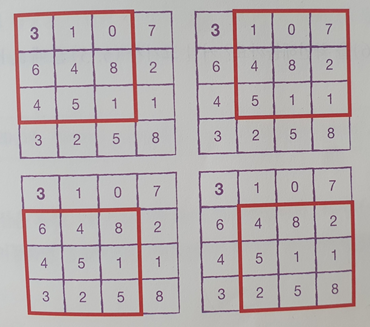  
반면 다른 원소들은 2번 이상 커널과 계산된다. 가운데 있는 4개 원소 4, 8, 5, 1은 4번의 합성곱 계산에 모두 포함된다. 만약 이 입력을 이미지라고 생각하면 모서리에 있는 중요한 정보가 특성 맵으로 잘 전달되지 않을 가능성이 높다. 반면 가운데 있는 정보는 두드러지게 표현된다.
<br><br/>
다음 그림을 보면 패딩을 하지 않을 경우 중앙부와 모서리 픽셀이 합성곱에 참여하는 비율은 크게 차이 난다.(4:1) 1픽셀을 패딩하면 이 차이는 크게 줄어든다.(9:4) 만약 2픽셀을 패딩하면 중앙부와 모서리 픽셀이 합성곱에 참여하는 비율이 동일해진다.(1:1)  
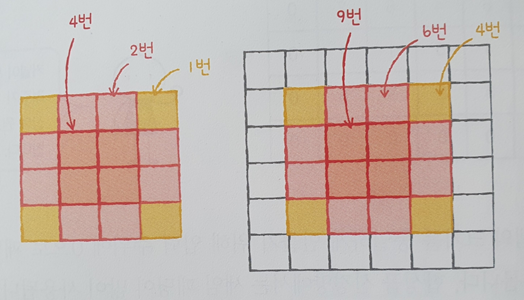  
직접 손으로 그림을 그려서 계산해보면 합성곱을 이해하는 데 큰 도움이 된다. 먼저 (4,4) 그림을 그려 보자. 커널 크기가 (3,3)일 때 a, b, c가 각각 몇 번 합성곱에 참여할까?  
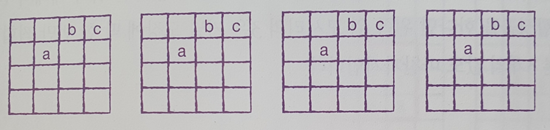  
이번에는 패딩을 준 (6,6)을 확인해 보자. 커널 크기가 (3,3)일 때 a, b, c는 합성곱에 몇 번 참여할까?  
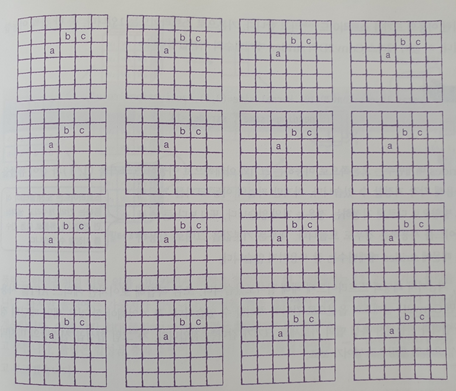  
정확하게 그렸다면, 첫 번째는 4, 2, 1번씩, 두 번째는 9, 6, 4번씩 참여한다고 확인할 수 있을 것이다.
<br><br/>
적절한 패딩은 이처럼 이미지의 주변에 있는 정보를 잃어버리지 않도록 도와준다. 언급 되었듯이 일반적인 합성곱 신경망에서는 세임 패딩이 많이 사용된다. 케라스 Conv2D 클래스에서는 padding 매개변수로 패딩을 지정할 수 있다. 기본값은 'valid'로 밸리드 패딩을 나타낸다. 세임 패딩을 사용하려면 'same'으로 지정한다.

```python
keras.layers.Conv2D(10, kernel_size(3,3), activation = 'relu', padding = 'same')
```

지금까지 본 합성곱 연산은 좌우, 위아래로 한 칸씩 이동했다. 하지만 두 칸씩 건너뛸 수도 있다. 이렇게 두 칸씩 이동하면 만들어지는 특성 맵의 크기는 더 작아질 것이다. 커널 도장을 찍는 횟수가 줄어들기 때문이다.  
이런 이동의 크기를 **스트라이드**(stride)라고 한다. 기본으로 스트라이드는 1이다. 즉 한 칸씩 이동한다. 이 값이 케라스 Conv2D의 strides 매개변수의 기본값이다.

```python
keras.layers.Conv2D(10, kernel_size = (3,3), activation = 'relu', padding = 'same', strides = 1)
```

strides 매개변수는 오른쪽으로 이동하는 크기와 아래쪽으로 이동하는 크기를 (1,1)과 같이 튜플을 사용해 각각 지정할 수 있다.  
하지만 커널의 이동 크기를 가로세로 방향으로 다르게 지정하는 경우는 거의 없다. 또 1보다 큰 스트라이드를 사용하는 경우도 드물다. 대부분 기본값을 그대로 사용하기 때문에 strides 매개변수는 잘 사용하지 않는다.
<br><br/>
패딩과 스트라이드에 대해 알아보았다. 케라스 API를 사용하면 Conv2D 클래스의 옵션으로 간단히 처리할 수 있다. 중요한 점은 세임 패딩의 경우 입력과 만들어진 특성 맵의 가로세로 크기가 같다는 점이다.

### 풀링  
**풀링**(pooling)은 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행한다. 하지만 특성 맵의 개수는 줄이지 않는다. 예를 들면 다음 그림처럼 (2, 2, 3) 크기의 특성 맵에 풀링을 적용하면 마지막 차원인 개수는 그대로 유지하고 너비와 높이만 줄어들어 (1, 1, 3) 크기의 특성 맵이 된다.  
##### 풀링은 특성 맵에 커널 없는 필터를 적용하는 것과 비슷하다.  
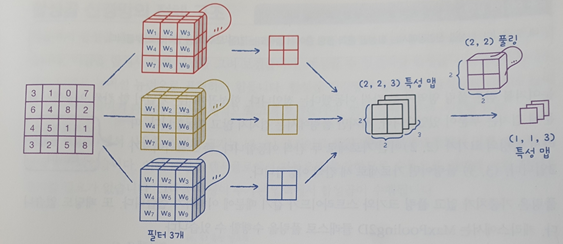  
풀링도 합성곱처럼 입력 위를 지나가면서 도장을 찍는다. 위 그림에서는 (2, 2) 크기로 풀링을 한다. 하지만 풀링에는 가중치가 없다. 도장을 찍은 영역에서 가장 큰 값을 고르거나 평균값을 계산한다.  
이를 각각 **최대 풀링**(max pooling)과 **평균 풀링**(average pooling)이라고 부른다. 풀링은 합성곱 층과 뚜렷이 구분되기 때문에 풀링 층이라고 부른다.
##### 풀링에는 가중치가 없다. 대신에 최댓값이나 평균값을 계산하는 역할을 수행한다.
다음과 같은 (4, 4) 크기의 특성 맵이 있다고 가정해 보자. 여기에 (2, 2) 최대 풀링을 적용하면 절반으로 크기가 줄어든다.  
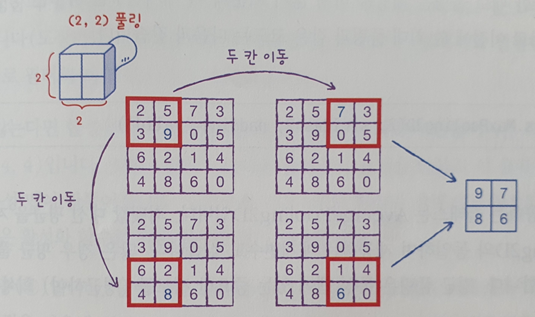  
최대 풀링은 가장 큰 값을 고르기 때문에 첫 번째 (2, 2) 영역에서 9를 고르고 그다음 7, 8, 6을 차례대로 골라 (2, 2) 크기의 출력을 만든다. 특성 맵이 여러 개라면 동일한 작업을 반복한다. 즉 10개의 특성 맵이 있다면 풀링을 거친 특성 맵도 10개가 된다.

#### 풀링 층의 출력도 특성 맵이라고 하나?  
합성곱 신경망에서는 합성곱 층과 풀링 층에서 출력되는 값을 모두 특성 맵이라고 부른다.

중요한 점은 풀링 영역이 두 칸씩 이동했다는 점이다. 합성곱에서는 커널이 한 칸씩 이동했기 때문에 겹치는 부분이 있었다. 하지만 풀링에서는 겹치지 않고 이동한다. 따라서 풀링의 크기가 (2, 2)이면 가로세로 두 칸씩 이동한다. 즉 스트라이드가 2이다. (3, 3) 풀링이면 가로세로 세 칸씩 이동한다.  
풀링은 가중치가 없고 풀링 크기와 스트라이드가 같기 때문에 이해하기 쉽다. 또한 패딩도 없다. 케라스에서는 MaxPooling2D 클래스로 풀링을 수행할 수 있다.
```python
keras.layers.MaxPooling2D(2)
```

MaxPooling2D의 첫 번째 매개변수로 풀링의 크기를 지정한다. 대부분 풀링의 크기는 2이다. 즉 가로세로 크기를 절반으로 줄인다. 가로세로 방향의 크기를 다르게 하려면 첫 번째 매개변수를 정수의 튜플로 지정할 수 있다.(예를 들면 (2,3)). 하지만 이런 경우는 드물다.  
합성곱 층과 마찬가지로 strides와 padding 매개변수를 제공한다. strides의 기본값은 자동으로 풀링의 크기이므로 따로 지정할 필요가 없다. padding의 기본값은 'valid'로 패딩을 하지 않는다. 앞서 언급한 대로 풀링은 패딩을 하지 않기 때문에 이 매개변수를 바꾸는 경우는 거의 없다.  
예를 들어 바로 이전에 쓴 최대 풀링과 같은 코드는 아래와 같다.  
```python
keras.layers.Maxpooling2D(2, strides = 2, padding = 'valid')
```

평균 풀링을 제공하는 클래스는 AveragePooling2D이다. 최댓값 대신 평균을 계산하는 것만 빼면 MaxPooling2D와 동일하며 제공하는 매개변수도 같다. 많은 경우 평균 풀링보다 최대 풀링을 많이 사용한다. 평균 풀링은 특성 맵에 있는 중요한 정보를 (평균하여) 희석시킬 수 있기 때문이다.
<br><br/>
중요한 점은 풀링은 가로세로 방향으로만 진행한다. 특성 맵의 개수는 변하지 않고 그대로이다.  
합성곱 신경망의 전체 구조를 살펴보자.

### 합성곱 신경망의 전체 구조  
합성곱 층, 필터, 패딩, 스트라이드, 풀링 등 중요한 합성곱 신경망의 개념을 모두 알아보았다. 합성곱 신경망은 7장에서처럼 일렬로 늘어선 뉴런으로 표현하기 힘들다. 합성곱 신경망의 입력은 일반적으로 너비와 높이가 있는 이미지이기 때문에 입체적으로 그려야 한다.  
합성곱 층(①)에서 사용할 커널의 크기는 (3, 3) 크기이고 세임 패딩이므로 1픽셀이 입력 데이터 주변에 추가된다. 이때 패딩은 텐서플로에서 자동으로 추가하므로 수동으로 입력에 어떤 작업을 추가할 필요가 없다. 그다음 패딩이 추가된 입력에서 합성곱이 수행된다.  
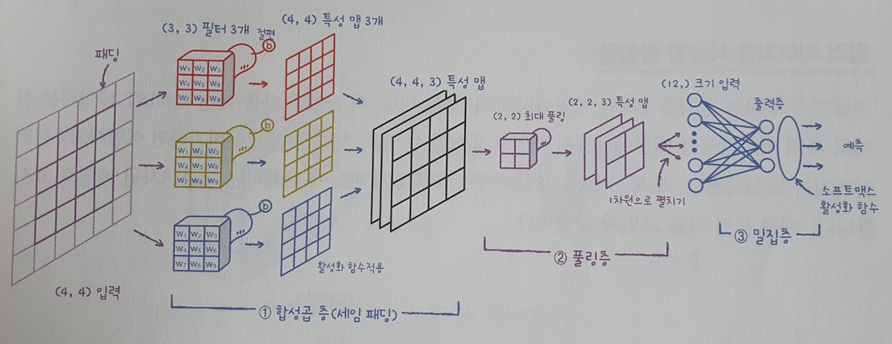  
이 그림에서 합성곱의 필터는 3개이다. 각각 (3, 3) 크기 가중치를 가지고 있으며 필터마다 절편이 하나씩 있다.(도장마다 절편 ⓑ가 끝에 메달려 있다.) 밀집층의 뉴런과 마찬가지로 필터의 가중치는 각기 서로 다르다.
<br><br/>
따로 설정하지 않는다면 합성곱의 스트라이드는 항상 1이다. 따라서 만들어지는 특성 맵의 크기는 입력과 동일한 (4, 4)이다. 3개의 필터가 하나씩 합성곱의 출력을 만들고 이 출력이 합쳐져서 (4, 4, 3) 크기의 특성 맵이 만들어진다. 밀집층과 마찬가지로 합성곱 층에서도 활성화 함수를 적용한다. 합성곱 층은 활성화 함수로 렐루 함수를 많이 사용한다.
<br><br/>
그다음은 풀링 층(②)이다. 풀링 층은 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄인다. 보통 (2, 2) 풀링을 사용해 절반으로 줄인다. 특성 맵의 개수는 변하지 않으므로 (4, 4, 3)에서 (2, 2, 3)으로 특성 맵 개수는 유지된다.
<br><br/>
풀링을 사용하는 이유는 합성곱에서 스트라이드를 크게 하여 특성 맵을 줄이는 것보다 풀링 층에서 크기를 줄이는 것이 경험적으로 더 나은 성능을 내기 때문이다. 합성곱 신경망은 이렇게 합성곱 층에서 특성 맵을 생성하고 풀링에서 크기를 줄이는 구조가 쌍을 이룬다.
<br><br/>
풀링을 거친 특성 맵의 크기는 절반으로 줄었기 때문에 (2, 2, 3)이 된다. 밀집층(③)인 출력층에 전달하려면 이 3차원 배열을 1차원으로 펼쳐야 한다.(7장에서 사용했던 Flatten 클래스를 이용.) 이 배열은 12개의 원소를 가진 1차원 배열이고 출력층의 입력이 된다.
<br><br/>
출력층에는 3개의 뉴런을 두었다. 즉 3개의 클래스를 분류하는 다중 분류 문제이다. 출력층에서 계산된 값은 소프트맥스 활성화 함수를 거쳐 최종 예측 확률이 된다.